In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Time Series Forecasting**

**Dataset:** Nepal Stock Exchange (NEPSE)

#### **Table of Contents**
1. [What is a time series?](#1-what-is-a-time-series)
2. [Why time series analysis?](#2-why-time-series-analysis)
3. [Time series features](#3-time-series-features)
4. [Time Dummy](#4-time-dummy)
5. [Stationarity](#5-stationarity)
    - 5.1 [Checking for Stationarity](#51-checking-for-stationarity)
    - 5.2 [Stationarity Test Evaluation Metrics](#52-stationarity-test-evaluation-metrics)
6. [Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)](#6-autocorrelation-function-acf-and-partial-autocorrelation-function-pacf)
7. [Exploratory Data Analysis (EDA)](#7-exploratory-data-analysis-eda)
    - 7.1 [Installing and Importing Packages](#71-installing-and-importing-packages)
    - 7.2 [Loading Data](#72-loading-data)
    - 7.3 [Basic Data Information](#73-basic-data-information)
        - 7.3.1 [Shape of the data](#731-shape-of-the-data)
        - 7.3.2 [Data types and missing values](#732-data-types-and-missing-values)
        - 7.3.3 [Data summary statistics](#733-data-summary-statistics)
        - 7.3.4 [Handling missing values](#734-handling-missing-values)
        - 7.3.5 [Time series decomposition](#735-time-series-decomposition)
        - 7.3.6 [Rolling Statistics](#736-rolling-statistics)
        - 7.3.7 [Lag Plot](#737-lag-plot)
            - 7.3.7.1 [Lag Plot Interpretation and Use Case](#7371-lag-plot-interpretation-and-use-case)
        - 7.3.8 [Stationarity Test](#738-stationarity-test)
            - 7.3.8.1 [Stationarity Test Interpretation](#7381-stationarity-test-interpretation)
        - 7.3.9 [Autocorrelation and Partial Autocorrelation Analysis](#736-autocorrelation-and-partial-autocorrelation-analysis)
8. [Univariate Vs. Multivariate Modeling for Forecasting](#8-univariate-vs-multivariate-modeling-for-forecasting)
9. [Seasonal AutoRegressive Integrated Moving Average (SARIMA)](#9-seasonal-autoregressive-integrated-moving-average-sarima)
10. [Long Short Term Memory (LSTM)](#10-long-short-term-memory-lstm)
11. [Evaluation Metrics](#11-evaluation-metrics)
12. [Conclusion](#12-conclusion)

#### **1. What is a time series?**

- A sequence of data points organized in time order.
- The sequence captures data at equally spaced points in time.
- Data collected irregularly is not considered time series.
- _Examples: Daily temperature readings, Stock prices, Monthly sales data, etc._

<div style="text-align: center;">
  <b>Time Series</b>
</div>
<br>
<div style="text-align: center;">
  <img src="https://cdn.corporatefinanceinstitute.com/assets/Time-Series-Analysis-1024x729.png" alt="Time Series" style="width: 500px; height: auto;" />
</div>

#### **2. Why time series analysis?**

Time series analysis helps us understand the underlying patterns in the data, such as

- **Trends**
    - The overall direction in which the data is moving over a long period.
    - It could be upward, downward, or flat.
    - _e.g. A steady increase in the population of a country over the past decade indicates an upward trend._

- **Seasonality**
    - Regular, repeating patterns in the data that occur at consistent intervals such as daily, weekly, monthly, or yearly (usually less than a year).
    -  _e.g. Sales increase during the holiday season._

- **Cycles**
    - Longer-term, irregular patterns that can span several years.
    -  _e.g. Recession and growth phases._

- **Outliers**
    - Points that deviate significantly from the rest.
    - Random variation in the data that cannot be attributed to trend, seasonality or cycle.
    - _e.g. An extremely hot day in winter._

    and these analysis can be used for forecasting future values.

<div style="text-align: center;">
  <b>Time Series Components</b>
</div>
<br>
<div style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:868/1*AQcc8J644VTQVdayai9y2w.jpeg" alt="Time Series Components" style="width: 1000px; height: auto;" />
</div>

#### **3. Time series features**

There are two kinds of features unique to time series: **time-step features** and **lag features**.

| Aspect         | Time Step Features                                     | Lag Features                                              |
| ---------------| ------------------------------------------------------ | --------------------------------------------------------- |
| **Definition** | Features based on the time index or timestamp.         | Features created by shifting the data to use past values. |
| **Purpose**    | Capture patterns related to the specific time of data. | Capture relationships between past and future data.       |
| **Features**   | Day of the week, month, year, hour.                    | Yesterday's value, last week's value, last month's value. |
| **Use Case**   | To account for periodic patterns (e.g., seasonality)   | To learn from past observations to predict future values  |
| **Dependence** | Time-step features let you model **time dependence**. A series is time dependent when an observation can be predicted from the time they occurred. | Lag features let you model **serial dependence**. A series is serial dependent when an observation can be predicted from previous observations. |

#### **4. Time Dummy**

The most basic time-step feature is the **Time Dummy**. **Time Dummies** provide a flexible way to account for both the general passage of time and the specific effects of particular time periods in time series analysis.

**1. Numerical Indexing**

- **Sequential representation:** They act as a numerical index that increases sequentially over time.

- **Time-based patterns:** This allows you to incorporate the passage of time into your analysis and model time-based patterns.

**2. Capturing Specific Time Periods**

- A time dummy can be used as a binary variable in regression models to control for specific time periods, capturing time-related effects that might influence the dependent variable.

- In essence, time dummies help models control for time-specific influences that may not be directly measured by other variables.

- In a sales model, you might create a dummy variable for each year, where Year_2020 = 1 for 2020 data and 0 for all other years, to account for COVID-19's impact.

#### **5. Stationarity**

- A time series is stationary if its statistical properties, like mean, variance and autocorrelation do not change over time.
- This means the series doesn't exhibit trends, seasonality, or changes in volatility over time.
- Stationarity is crucial because many time series models, like **ARIMA** and **SARIMA**, assume that the data is stationary to make accurate forecasts and inferences.

##### **5.1 Checking for Stationarity**

- **Plotting**: Visual inspection can sometimes reveal stationarity if the trend or seasonality is absent.
- **Statistical Tests**: Using tests like the **Augmented Dickey-Fuller (ADF)** test to statistically check for stationarity.
- **Making Series Stationary**: If the series is not stationary, we can use techniques like **differencing** (subtracting previous value from current) or **detrending**.

    - _**Differencing:** is used to remove trends and seasonality from a time series by calculating the differences between consecutive observations. This technique helps stabilize the mean of the time series._

    - _**Detrending:** Involves fitting and removing a trend component from the series, which can be done through various techniques including subtraction of a trend line or filtering._   

##### **5.2 Stationarity Test Evaluation Metrics**

**1. ADF Statistic:**
- This value is compared against critical values.
- A more negative ADF statistic indicates stronger evidence against the null hypothesis.
- Null hypothesis states that the time series has a unit root and is non-stationary.

**2. p-value:**
- This value helps determine the significance of the test.
- A p-value less than a chosen significance level (commonly 0.05) suggests rejecting the null hypothesis, indicating that the time series is stationary.

**3. Critical Values:**
- These are the thresholds for the ADF statistic at different confidence levels (e.g., 1%, 5%, 10%).
- If the ADF statistic is less than the critical value, it provides evidence that the series is stationary.

<div style="text-align: center;">
  <b>Stationarity</b>
</div>
<br>
<div style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:1370/1*ltLfFhoZypScZFA6W-D8AA.png" alt="Time Series" style="width: 800px; height: auto;" />
</div>

#### **6. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)**

- **Auto-Correlation Function:** Direct and Indirect effect of values in previous time lags with current time period.
- **Partial Auto-Correlation Function:** Only Direct effect of values in previous time lags with current time period.

| Aspect | Autocorrelation | Partial Autocorrelation |
|--------|-----------------|-------------------------|
| **Definition** | Measures how related current values of a series are to its past values (lags).<br><br>High autocorrelation indicates that past values influence current values.<br><br>**Includes the effects of lags 1, 2, ..., `k-1`**. | Measures the correlation between a time series and its own lagged values, **but after removing the effects of the intermediate lags**.<br><br>Tells **how much the current value is directly related to a specific lag, without the influence of shorter lags**.<br><br>Isolates the direct relationship between the time series and lag `k`. |
| **Purpose** | To identify the relationship between current values and past values in a time series.<br><br>Useful for understanding how past values influence current values and for modeling time series data. | To isolate and measure the direct impact of specific lags on the current value, excluding the influence of shorter lags.<br><br>Helps determine the exact number of significant lags in autoregressive models.|
| **Effect of Intermediate Lags** | Autocorrelation for lag `k` includes the effects of lags 1, 2, ..., `k-1`. | Removes the impact of other, shorter lags (lags 1, 2, ..., `k-1`) when calculating the correlation for lag `k`.<br><br>Ensures that the PACF for lag `k` measures only the direct relationship between the current value and lag `k`. |
| **Example** | If the value at time `t` is highly correlated with the value at time `t-1`, this indicates strong autocorrelation for lag 1. | The current value at time `t` may be correlated with the value at time `t-1` (lag 1).<br><br>The value at time `t-1` (lag 1) might be correlated with the value at time `t-2` (lag 2).<br><br>When calculating PACF for lag 3, it excludes the influence of lag 1 and lag 2, focusing on the direct relationship between the value at time `t` and lag 3. |

<div style="text-align: center;">
  <b>Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)</b>
</div>
<br>
<div style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*SlmQlOYrwVyngsH5bh0iCA.jpeg" alt="Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)" style="width: 800px; height: auto;" />
</div>

##### **Interpreting ACF and PACF Plots:**

**1. ACF Plot:**
- The value is between [-1, 1] for Pearson Correlation Coefficient.
- **Strong Correlation at Lag 1:** This means that the value of the series today is similar to the value yesterday. It suggests a short-term **trend**.
- **Strong Correlation at Lag 12:** This indicates a seasonal pattern every 12 periods (e.g., every month if you have monthly data). It shows that the value today is similar to the value 12 periods ago, which means there's yearly **seasonality**.

**2. PACF Plot:**

- **Sharp Cutoff after Lag 12:** This shows that after accounting for the influence of earlier lags (up to 11), the correlation at lag 12 is still strong. It confirms the seasonal pattern in the ACF plot.

##### **Model Building Implications**

1. **Including Lags 1 and 12:**
    - Lag 1: Including this lag in the model accounts for short-term dependencies or trends.
    - Lag 12: Including this lag helps capture the seasonal pattern in the time series.

2. **Additional Lags:**
    - If the ACF plot shows significant correlations at other lags beyond 12, we might consider including those lags in the model as well. This can help capture additional structure in the data.

#### **7. Exploratory Data Analysis (EDA)**

- Visualize the time series data.
- Make the time series data stationary.
- Plot the correlation and autocorrelation charts.

##### **7.1 Installing and Importing Packages**

In [2]:
! pip install numpy pandas matplotlib scikit-learn statsmodels

In [3]:
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

##### **7.2 Loading Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/stock_data_top50.csv')
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Close_ADBL,Close_AHPC,Close_AKJCL,Close_AKPL,Close_ALBSL,Close_ALICL,Close_API,Close_BARUN,Close_BFC,...,Vol_JFL,Vol_JOSHI,Vol_KKHC,Vol_KMCDB,Vol_KRBL,Vol_KSBBL,Vol_LBBL,Vol_LEC,Vol_LICN,Vol_MBL
0,2022-01-01,492.0,429.8,273.0,493.0,1415.0,1123.0,445.0,462.0,440.0,...,11922.0,53763.0,4942.0,4439.0,3047.0,29013.0,37355.0,7084.0,3287.0,58672.0
1,2022-01-02,411.0,442.0,273.0,506.0,1438.0,1165.0,467.0,458.0,438.1,...,8566.0,39788.0,8084.0,6016.0,10196.0,44696.0,82207.0,2890.0,3495.0,114133.0
2,2022-01-03,415.0,435.0,273.9,504.9,1518.7,1171.0,469.0,462.0,442.0,...,34660.0,48659.0,12504.0,6754.0,8601.0,57667.0,111032.0,8278.0,4318.0,200383.0
3,2022-01-04,422.0,445.0,280.0,514.2,1508.0,1180.0,475.0,470.0,456.0,...,27374.0,72353.0,7265.0,33773.0,22320.0,102186.0,110308.0,13200.0,4077.0,153230.0
4,2022-01-05,419.0,450.0,286.0,514.0,1460.0,1169.9,477.0,471.0,460.0,...,39191.0,145275.0,15918.0,6695.0,25669.0,84716.0,105798.0,28057.0,12268.0,95538.0


##### **7.3 Basic Data Information**
Check the shape, data types, and summary statistics of the dataset.

##### **7.3.1 Shape of the data**

In [5]:
df.shape

(967, 251)

##### **7.3.2 Data types and missing values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Columns: 251 entries, Date to Vol_MBL
dtypes: datetime64[ns](1), float64(250)
memory usage: 1.9 MB


In [7]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


##### **7.3.3 Data summary statistics**

In [8]:
df.describe()

,Date,Close_ADBL,Close_AHPC,Close_AKJCL,Close_AKPL,Close_ALBSL,Close_ALICL,Close_API,Close_BARUN,Close_BFC,...,Vol_JFL,Vol_JOSHI,Vol_KKHC,Vol_KMCDB,Vol_KRBL,Vol_KSBBL,Vol_LBBL,Vol_LEC,Vol_LICN,Vol_MBL
count,967,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,...,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,967.000000,967.000000
mean,2023-05-16 22:51:29.968976128,297.582730,290.964116,212.872389,320.289038,960.981696,660.098035,250.952223,297.096277,378.451189,...,29589.133402,41127.616339,16654.768356,5045.342296,24737.132368,49626.166494,45116.024819,6.032691e+04,9909.068252,62334.740434
min,2022-01-01 00:00:00,223.400000,149.100000,144.000000,154.000000,555.000000,430.000000,156.900000,192.000000,284.000000,...,20.000000,90.000000,30.000000,33.000000,50.000000,2452.000000,870.000000,4.000000e+01,83.000000,2054.000000
25%,2022-09-11 12:00:00,245.000000,211.000000,186.500000,184.650000,710.000000,566.000000,183.000000,231.100000,318.750000,...,4935.000000,8783.000000,4326.000000,865.000000,5786.000000,17515.000000,16691.500000,8.453500e+03,2748.000000,22245.000000
50%,2023-05-25 00:00:00,291.000000,277.000000,211.900000,352.000000,928.000000,632.000000,223.300000,254.400000,344.000000,...,10058.000000,24141.000000,8977.000000,1848.000000,12434.000000,30944.000000,28311.000000,2.087600e+04,5273.000000,36772.000000
75%,2024-01-22 12:00:00,331.400000,340.500000,229.000000,419.100000,1128.500000,705.250000,273.750000,343.050000,410.000000,...,27512.500000,49545.000000,17731.500000,6110.000000,31521.500000,57293.000000,51707.500000,5.612550e+04,11402.000000,68488.000000
max,2024-09-20 00:00:00,492.000000,599.000000,336.000000,602.900000,1730.000000,1341.000000,557.000000,577.000000,723.000000,...,327343.000000,369561.000000,254996.000000,56508.000000,209088.000000,368450.000000,332398.000000,1.204434e+06,123864.000000,754130.000000
std,NaN,59.193719,101.064215,40.886371,127.938953,274.901855,150.058841,94.720338,99.128511,87.117197,...,48526.056348,52542.685783,26169.796101,7534.538874,32574.797395,55553.869407,47621.074277,1.149791e+05,13514.135579,83811.612421


##### **7.3.4 Handling missing values**

In [9]:
# Fill any NaNs in numeric columns with forward fill and then backward fill as a last resort
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Drop rows where critical columns like 'Date' or 'Symbol' are still missing
df.dropna(subset=['Date'], inplace=True)

<ipython-input-9-ad2173e92c45>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-9-ad2173e92c45>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


##### **7.3.5 Time series decomposition**

In [10]:
df.set_index('Date', inplace=True)
df

,Close_ADBL,Close_AHPC,Close_AKJCL,Close_AKPL,Close_ALBSL,Close_ALICL,Close_API,Close_BARUN,Close_BFC,Close_BPCL,...,Vol_JFL,Vol_JOSHI,Vol_KKHC,Vol_KMCDB,Vol_KRBL,Vol_KSBBL,Vol_LBBL,Vol_LEC,Vol_LICN,Vol_MBL
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,492.0,429.8,273.0,493.0,1415.0,1123.0,445.0,462.0,440.0,415.0,...,11922.0,53763.0,4942.0,4439.0,3047.0,29013.0,37355.0,7084.0,3287.0,58672.0
2022-01-02,411.0,442.0,273.0,506.0,1438.0,1165.0,467.0,458.0,438.1,415.0,...,8566.0,39788.0,8084.0,6016.0,10196.0,44696.0,82207.0,2890.0,3495.0,114133.0
2022-01-03,415.0,435.0,273.9,504.9,1518.7,1171.0,469.0,462.0,442.0,418.0,...,34660.0,48659.0,12504.0,6754.0,8601.0,57667.0,111032.0,8278.0,4318.0,200383.0
2022-01-04,422.0,445.0,280.0,514.2,1508.0,1180.0,475.0,470.0,456.0,424.0,...,27374.0,72353.0,7265.0,33773.0,22320.0,102186.0,110308.0,13200.0,4077.0,153230.0
2022-01-05,419.0,450.0,286.0,514.0,1460.0,1169.9,477.0,471.0,460.0,425.0,...,39191.0,145275.0,15918.0,6695.0,25669.0,84716.0,105798.0,28057.0,12268.0,95538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,349.1,271.1,210.0,241.1,1015.0,698.9,318.7,336.0,575.9,423.0,...,65225.0,50464.0,27190.0,6030.0,37201.0,42231.0,27876.0,146751.0,11317.0,45487.0
2024-09-17,349.1,271.1,210.0,241.1,1015.0,698.9,318.7,336.0,575.9,423.0,...,65225.0,50464.0,27190.0,6030.0,37201.0,42231.0,27876.0,146751.0,11317.0,45487.0
2024-09-18,353.1,271.0,207.1,236.3,1005.0,684.0,317.0,336.8,544.0,415.0,...,37935.0,35889.0,13011.0,8171.0,35103.0,39751.0,31725.0,171246.0,13428.0,67383.0


**1. Additive Model:**
- Assumes that the components (trend, seasonality, and residual) are added together.
- Use an additive model when the seasonal variations are consistent over time.
- The relationship can be expressed as:
`Y(t)=T(t)+S(t)+R(t)`

**2. Multiplicative Model:**
- Assumes that the components are multiplied together.
- Use a multiplicative model when the seasonal variations increase or decrease with the level of the series.
- The relationship can be expressed as:
`Y(t)=T(t)×S(t)×R(t)`

In [11]:
close_adbl = df['Close_ADBL']
result = seasonal_decompose(close_adbl, model='additive', period=30)

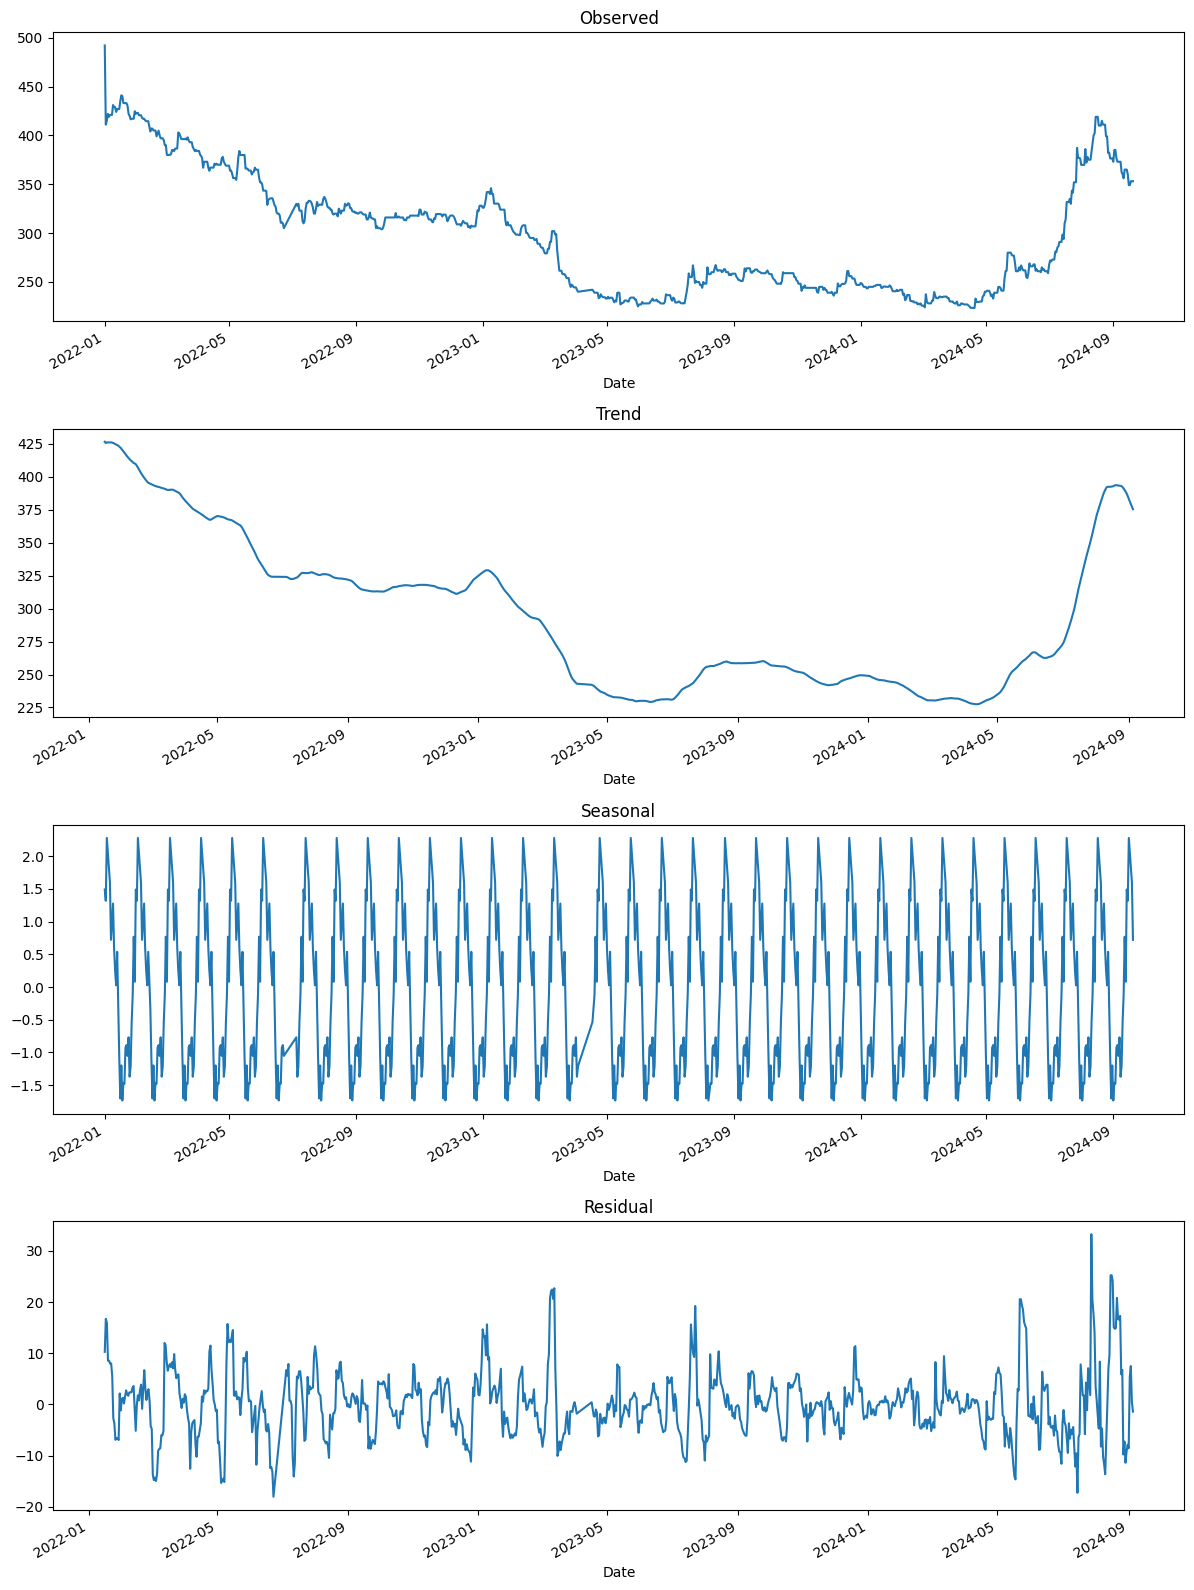

In [12]:
# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

##### **7.3.6 Rolling statistics**

- Rolling mean (10-day window)
- Rolling standard deviation (10-day window)
- Original data

These plots help visualize trends and volatility over time.

**1. Rolling Mean:**
- Rolling Mean smooths out short-term fluctuations and highlights longer-term trends in the data.
    - If the rolling mean shows an upward trend, it indicates that the average value of the time series is increasing over time.
    - Conversely, a downward trend in the rolling mean suggests a decrease in the average value.
    - If the rolling mean is relatively flat, it indicates stability in the average value over the observed period.

**2. Rolling Standard Deviation:**
- Rolling Standard Deviation indicates increasing volatility in the time series, meaning that the values are becoming more spread out from the mean.
    - A rising rolling standard deviation indicates increasing volatility in the time series, meaning that the values are becoming more spread out from the mean.
    - A declining rolling standard deviation suggests decreasing volatility, indicating that the values are becoming more consistent and closer to the mean.
    - If the rolling standard deviation remains relatively constant, it indicates stable variability in the data.

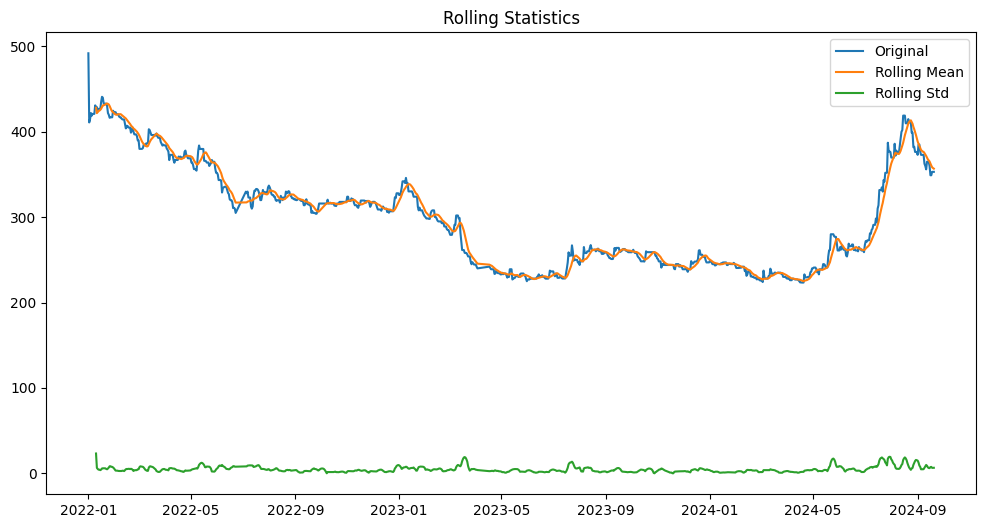

In [13]:
# Calculate rolling mean and standard deviation
rolling_mean = close_adbl.rolling(window=10).mean()
rolling_std = close_adbl.rolling(window=10).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(close_adbl, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Statistics')
plt.show()

##### **7.3.7 Lag Plot**

Creates a lag plot, which helps visualize the relationship between an observation and its lagged version.

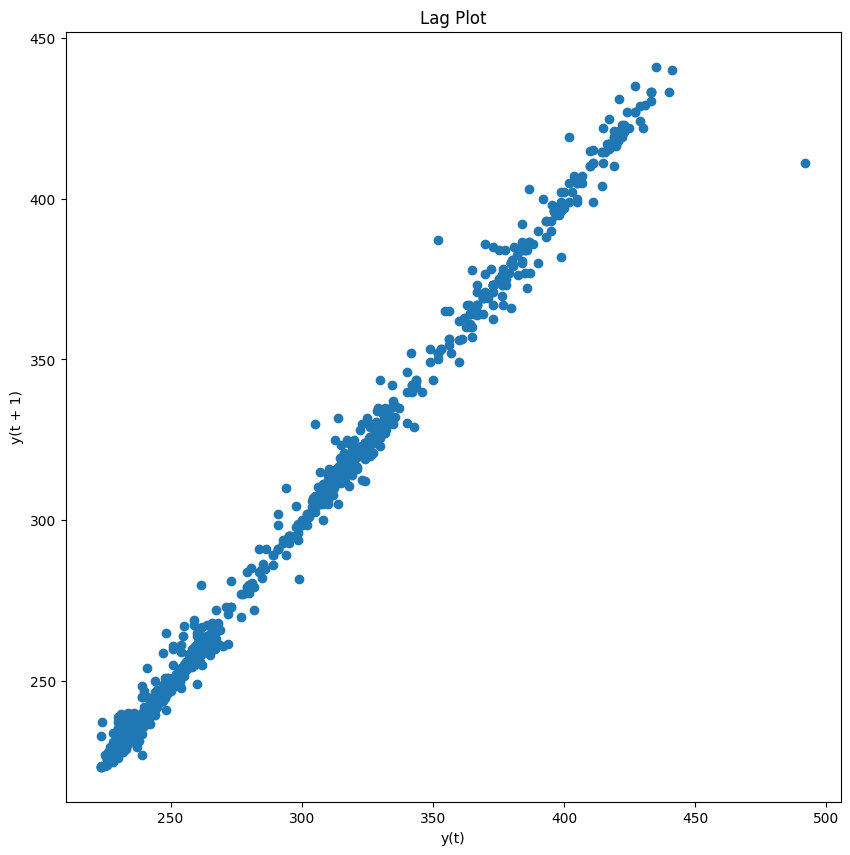

In [14]:
plt.figure(figsize=(10, 10))
lag_plot(close_adbl)
plt.title('Lag Plot')
plt.show()

##### **7.3.7.1 Lag Plot Interpretation and Use Case**

**Interpretation**

- **Diagonal Line:** If points cluster around a diagonal line, it suggests a strong correlation between the current and lagged values.

- **Random Scatter:** If points are randomly scattered, it indicates no significant relationship, suggesting that past values do not influence future values.

**Use Case**

Lag plots are particularly useful for identifying autocorrelation in time series data, which is essential for model selection in time series forecasting.

##### **7.3.8 Stationarity Test**

- Imports the Augmented Dickey-Fuller test function.
- Defines a custom function to perform the test and print results.
- Applies the test to the stock data to check for stationarity.

In [15]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

test_stationarity(close_adbl)

ADF Statistic: -2.0039100247956005
p-value: 0.2848613255899981
Critical Values: {'1%': -3.4372087295925664, '5%': -2.8645680048962348, '10%': -2.5683822785402914}


##### **7.3.8.1 Stationarity Test Interpretation**

**1. ADF Statistic:** The value of -2.00 is greater than the critical values at all levels (1%, 5%, and 10%). This indicates that the test does not provide strong evidence against the null hypothesis.

**2. p-value:** The p-value of 0.28 is significantly greater than the common significance level of 0.05. This suggests that we fail to reject the null hypothesis.

**3. Conclusion:** Since the ADF statistic is not less than the critical values and the p-value is greater than 0.05, we conclude that the time series is non-stationary.

This means that the statistical properties of the series, such as mean and variance, change over time, and we may need to apply techniques like differencing or detrending to achieve stationarity before further analysis.

##### **7.3.9 Autocorrelation and Partial Autocorrelation Analysis**

- Creates plots for ACF and PACF with 100 lags, which help identify potential AR and MA terms for time series modeling.

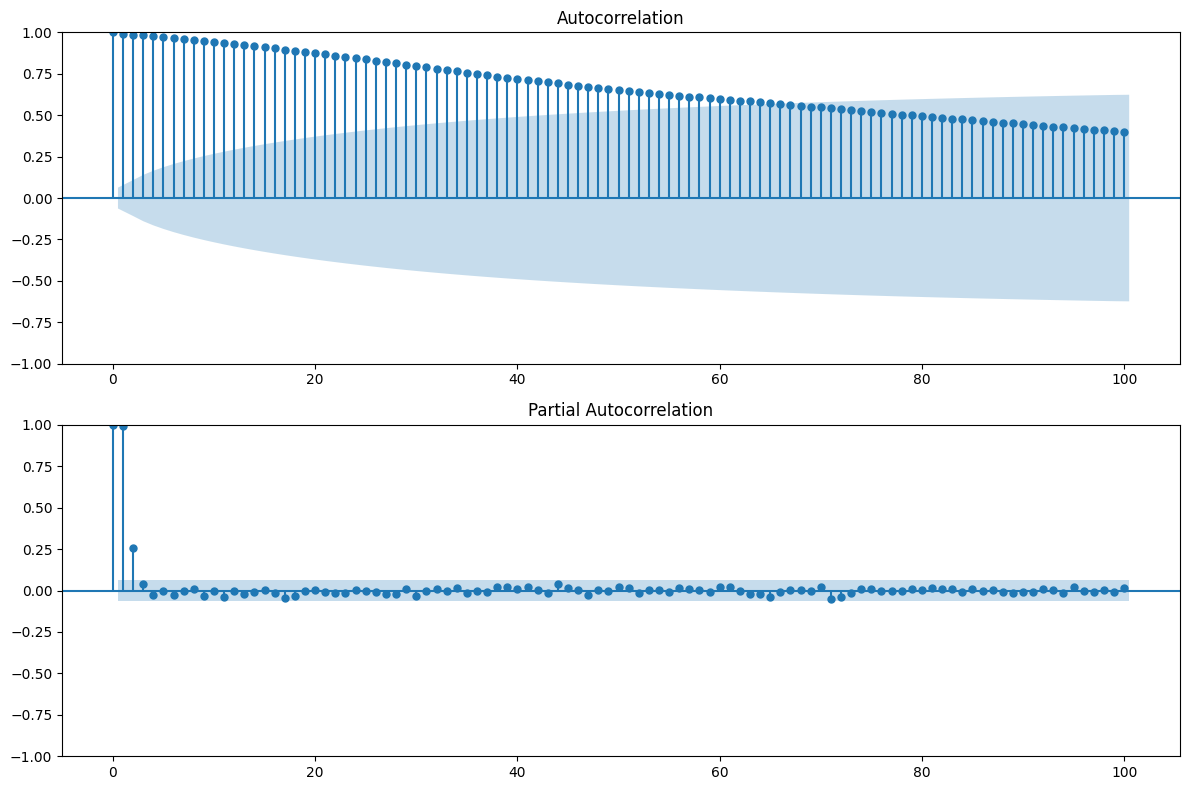

In [16]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(close_adbl, ax=ax1, lags=100)
plot_pacf(close_adbl, ax=ax2, lags=100)
plt.tight_layout()
plt.show()

##### **7.3.9.1 ACF and PACF Plot Interpretation**

**1. Autocorrelation Function (ACF)**
- The ACF shows a gradual decline in correlation as the lag increases, indicating that past values have a significant influence on current values.

- The first few lags (up to around 10) have high positive correlations, suggesting strong short-term dependencies.

- As the lag increases, the correlation decreases, but remains positive, indicating a long memory effect.

- The shaded area represents the confidence interval; values outside this area are statistically significant.

**2. Partial Autocorrelation Function (PACF)**
- The PACF shows a sharp drop after the first lag, indicating that the first lag has a strong direct influence on the current value, while subsequent lags have diminishing effects.

- The first lag is significant, while the correlations for higher lags (beyond the first) are mostly within the confidence interval, suggesting they do not provide additional predictive power.

The ACF suggests that an autoregressive model (AR) may be appropriate, particularly with the first few lags. The PACF indicates that including only the first lag in an AR model might suffice, as higher lags do not contribute significantly.


#### **8. Univariate Vs. Multivariate Modeling for Forecasting**

| Aspect                | Univariate Modeling                        | Multivariate Modeling                          |
|---------------------------|------------------------------------------------|---------------------------------------------------|
| **Number of Variables**    | Only one variable (or feature) is being analyzed, and no external factors or other variables are considered.              | Using multiple variables (features) that may be related to the target variable. |
| **Focus**                  | Past values of the target series.               | Past values of the target + influencing variables.  |
| **Complexity**             | Simpler, easier to implement.                   | More complex, requires handling interactions.       |
| **Examples of Models**     | MA, AR, ARIMA, SARIMA, Exponential Smoothing.           | VAR, VARMA, Dynamic Regression, LSTM, RNN.          |
| **Accuracy**               | May be less accurate when external factors influence the target | Higher accuracy by using additional relevant variables |
| **Use Cases**              | Predicting stock prices based only on past prices | Predicting stock prices using past prices + trading volume, economic indicators. |
| **Computation**            | Less computationally intensive.                 | More computationally intensive due to multiple series. |
| **Data Requirements**      | Requires only the target series data.           | Requires additional data on related variables.      |


#### **9. Seasonal AutoRegressive Integrated Moving Average (SARIMA)**

##### **9.1 Import necessary libraries for time series analysis and model evaluation**

In [17]:
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools

##### **9.2 Resample the data to the monthly level**

In [18]:
monthly_mean_df = df.resample('M').mean()

<ipython-input-18-d5c3056ed8a2>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_df = df.resample('M').mean()


##### **9.3 Prepare data: extract 'Close_ADBL' series and split into train (60%) and test (40%) sets without shuffling**

In [19]:
modelling_series_adbl = monthly_mean_df['Close_ADBL']
train,test = split(modelling_series_adbl,train_size=0.6,shuffle=False)

##### **9.4 Hyperparameters Tuning**

In [20]:
# Define the p, d, q ranges
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Initialize lists to store the parameters and AIC values
list_param = []
list_param_seasonal = []
list_results_aic = []

# Initialize variables to track the best model
best_aic = float("inf")
best_param = None
best_param_seasonal = None

# Loop through all combinations of pdq and seasonal_pdq
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Fit the SARIMA model
            model = SARIMAX(train,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = model.fit()

            # Append parameters and AIC to the lists
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            # Check if this model has the lowest AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal

        except:
            continue

# Print the best model parameters
print("\nBest Model:")
print('ARIMA{}x{}12 - AIC:{}'.format(best_param, best_param_seasonal, best_aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:260.2914259776002
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:86.86792742931378
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:76.02264678786386
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:63.61520704458565
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:55.11345757397092
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:227.91106443542853
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:70.57366031967753
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:59.968175278227775
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:65.77996384374698
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:46.196877373010594
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:199.94090346687355
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:57.00169971066747
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:185.15502664568538
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:63.60248106281977


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:43.41988320366566
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:147.04307106792223
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:47.93077572956065


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:45.275176562743795
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:54.34560808057984


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:47.908335613839036
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:138.04157761089652
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:37.95992434005086
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:37.63323230711272
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:52.739435826517045
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:37.633911255171355
ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:6.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat


ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:127.20930971743067
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:27.340207273317798
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:30.608624010943693
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:54.18355656406929


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:27.957132570281743
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:140.32512343240467


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:37.26281670326491
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:37.95497258433346
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:43.421210184114344


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:38.40996523577702
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_

ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:130.02081152010373
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:31.676430803981578
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:31.5595770266274
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:45.207632988378556
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:32.77895668868064
ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:123.5364852173429


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:-6.502438149694491
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:24.078377810307018
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:47.00042291114825


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:-5.5558578377419465
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:148.3572424369576
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:55.059391959529606


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:54.88734359353178
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:53.037990597777934
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:55.03799058182335
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:142.91884145208618
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:48.49552426457986
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:46.7539565932502
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:51.30302742821644


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:47.15362065829492
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:135.89445199268846
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:42.12363449473052
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:41.01890579027945


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:51.809699327481184
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:42.082642019158676
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:144.4847298323575
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:44.91054243710393
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:46.300819934810974
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:44.04858338216496
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:46.04858337839561
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:137.46518552237066


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:39.57927644594923
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:39.612182200086764
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:45.18717304266866
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:39.47004756612113


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:129.14835359665793


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:25.337110968252695
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:32.16773567672849
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:42.10303448543314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for v

ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:-16.465841154672997
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:138.77780790232933


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:39.25332175119543
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:39.8184093201045
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:4.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:38.21404034198475
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:40.21404034725374
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:131.60764145068202
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:31.40798346463592
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:39.6763118951116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:34.16376703180043
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:125.46241430251014


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:-9.8747887973622
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:26.057937853525736
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:41.38771759304318


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:-6.5673367053192635
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:142.81425623462832


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:56.93764671551659
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:47.57247541692428
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:41.7501268766151
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:47.823298514359884
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:144.7905394996355
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:46.80084063315046
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:48.68930967313957
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:40.42943394584191


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:46.433594067048055
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/

ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:138.14294594341231
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:38.64848099538769
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:42.38706082030822
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:43.45501275168334
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:40.743793299287894
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:137.68408229615488


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:46.693715593238956
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:38.45310693757199
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:38.395824845663114
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:40.39582486530435
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:139.68361734481178
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:36.42954862888527
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:39.44403098246971
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:38.417491381096504


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:16.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:130.61810915339277
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:28.301555618310967
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:-6.524342875095805
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:36.143359658292724


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for v

ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:-6.999967207777857
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:133.27100881897354


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:40.489706897042026
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:30.577729546447387
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:6.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:8.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:4.0511841189212285


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:7.385704517324545
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar 

ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:10.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:133.60596303334728


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimat

ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:29.592169179187803
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:33.95128713590418
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:34.69009728144182


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:9.73256274585508
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:127.45675375944158


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for v

ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-4.649069738286901
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:14.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for 

ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:4.295443496621067
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:35.94497349811158


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for v

ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2.245390497841756
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0

Best Model:
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:-16.465841154672997


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

##### **9.5 Train Test Data with Predictions**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


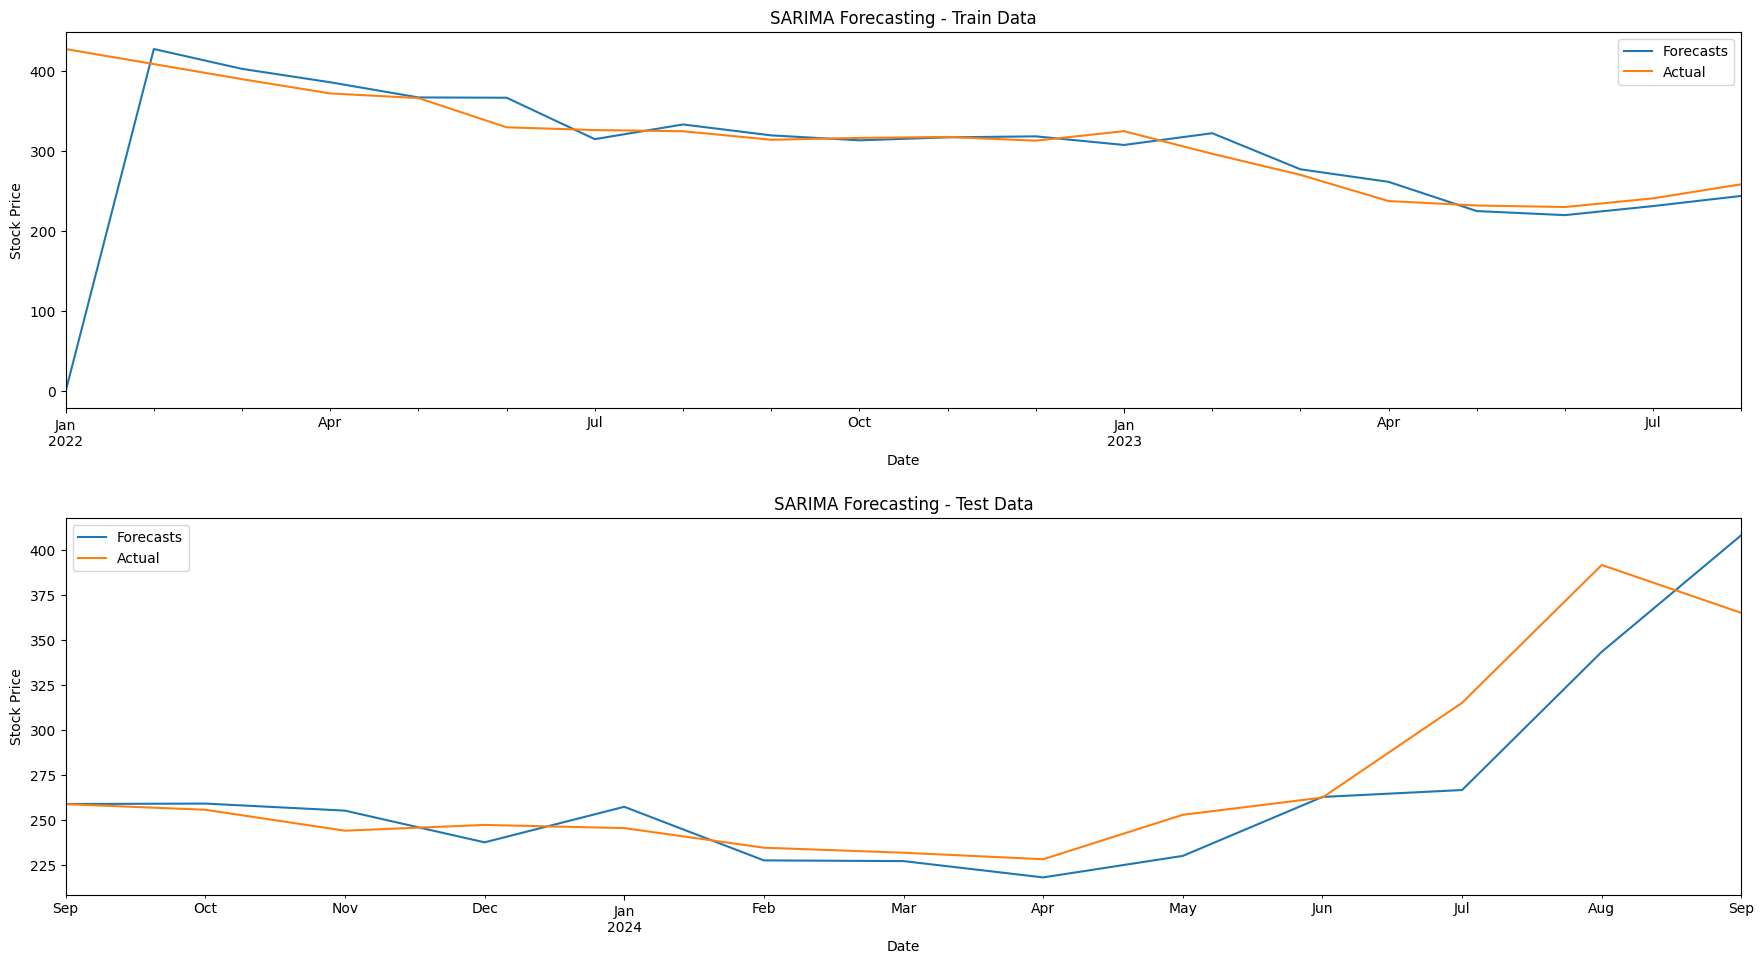

In [21]:
model = sm.tsa.SARIMAX(modelling_series_adbl,order=(1,1,2),seasonal_order=(1,0,1,12))
results=model.fit()
forecasts_train = results.predict(start='2022-01-31',end='2023-08-31')
forecasts_test = results.predict(start='2023-09-30',end='2024-09-30')

sd='2022-01-31'
ed='2023-08-31'
sd2='2023-09-30'
ed2='2024-09-30'

fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting - Train Data')
modelling_series_adbl.loc[sd:ed].plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting - Test Data')
modelling_series_adbl.loc[sd2:ed2].plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

##### **9.6 Train Test Data with Predictions and Forecast**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-22-0a17557559f7>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2024-10-31', periods=10, freq='M')  # Correct frequency (monthly)


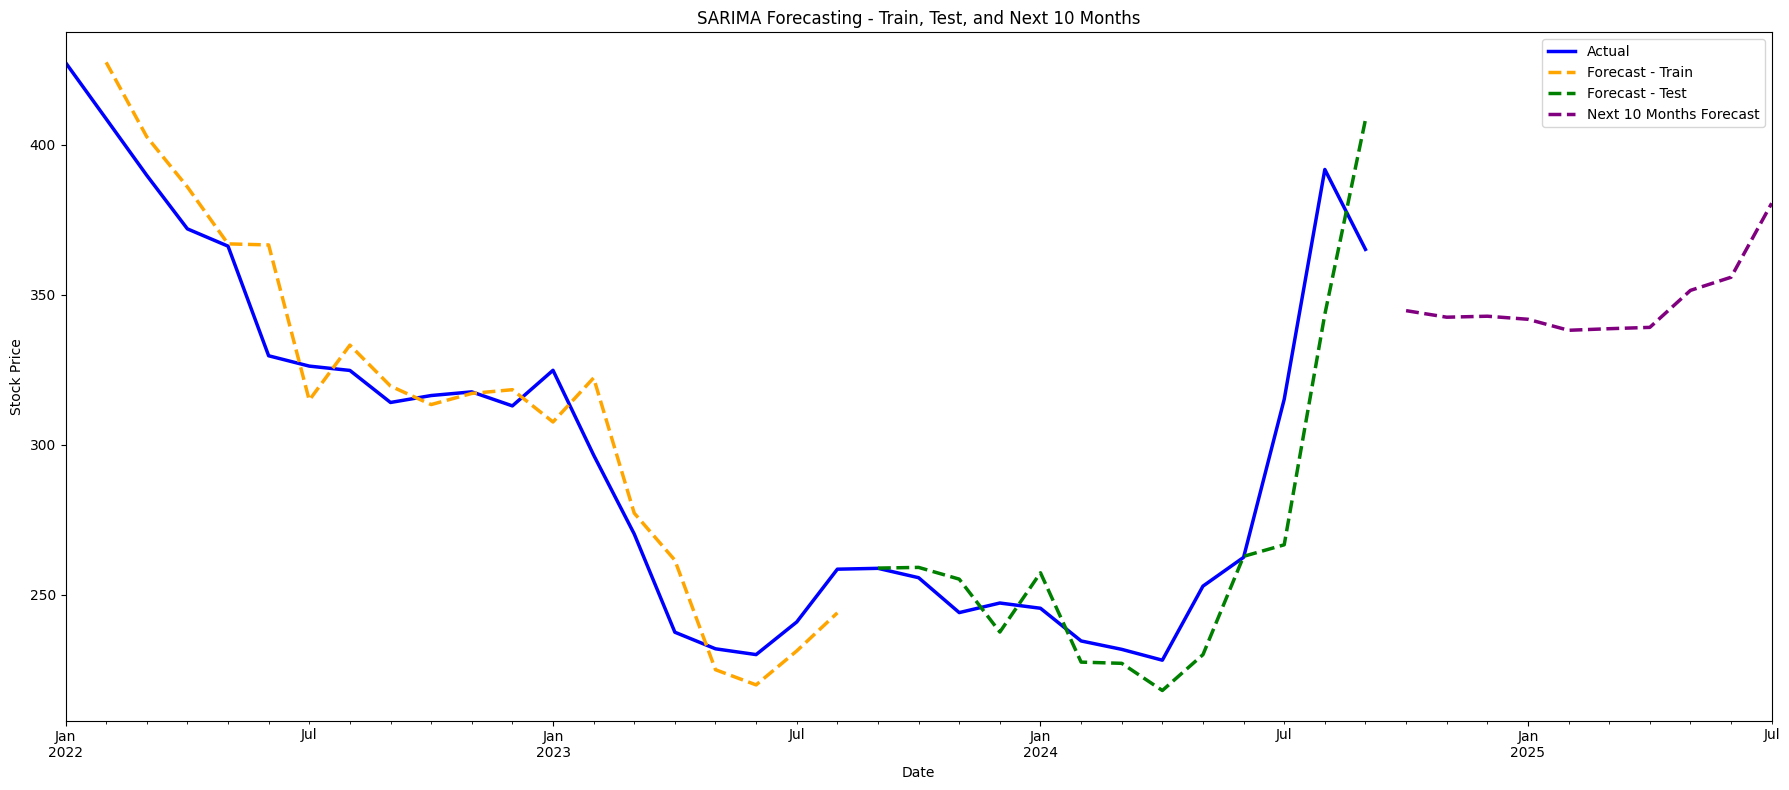

In [22]:
# Fit the model as before
model = sm.tsa.SARIMAX(modelling_series_adbl, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Train and Test Forecasts
forecasts_train = results.predict(start='2022-02-28', end='2023-08-31')
forecasts_test = results.predict(start='2023-09-30', end='2024-09-30')

# Forecast for the next 10 months after the test data
next_10_months_forecast = results.get_forecast(steps=10)
forecast_index = pd.date_range(start='2024-10-31', periods=10, freq='M')  # Correct frequency (monthly)

# Combine the forecasts for plotting
forecast_combined = pd.concat([
    forecasts_train,
    forecasts_test,
    pd.Series(next_10_months_forecast.predicted_mean, index=forecast_index)
])

# Start plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Plot Actual Data
modelling_series_adbl.plot(ax=ax, label='Actual', color='blue', linewidth=2.5)  # Bold actual data

# Plot Train Forecast Data
forecasts_train.plot(ax=ax, label='Forecast - Train', color='orange', linestyle='--', linewidth=2.5)  # Bolder forecast

# Plot Test Forecast Data
forecasts_test.plot(ax=ax, label='Forecast - Test', color='green', linestyle='--', linewidth=2.5)

# Plot Next 10 Months Forecast Data
next_10_months_forecast.predicted_mean.plot(ax=ax, label='Next 10 Months Forecast', color='purple', linestyle='--', linewidth=2.5)

# Set graph limits
y_min = min(modelling_series_adbl.min(), forecasts_train.min(), forecasts_test.min(), next_10_months_forecast.predicted_mean.min())
y_max = max(modelling_series_adbl.max(), forecasts_train.max(), forecasts_test.max(), next_10_months_forecast.predicted_mean.max())
ax.set_ylim(y_min - 10, y_max + 10)  # Setting limits for the y-axis

# Customize labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('SARIMA Forecasting - Train, Test, and Next 10 Months')

# Display the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### **9.7 SARIMA Evaluation Metrics**

In [23]:
# Initialize lists to store metrics for each split
mae_list = []
mse_list = []
rmse_list = []
mape_list = []

## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series_adbl.values

# Assume time_series_splits and X are already defined, and you're using SARIMAX
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]

    # Fit the model on the training data
    model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(0, 1, 2, 12))
    results = model.fit()

    # Forecast on the test data
    forecasts = results.predict(start=len(train), end=len(train) + len(test) - 1)

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, forecasts)
    mse = mean_squared_error(test, forecasts)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - forecasts) / test)) * 100

    # Append metrics to their respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)

    # Print evaluation metrics for this split
    print(f'MAE for this split: {mae}')
    print(f'MSE for this split: {mse}')
    print(f'RMSE for this split: {rmse}')
    print(f'MAPE for this split: {mape:.2f}%')

# Calculate and print average values across all splits
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mape = np.mean(mape_list)

print(f'\nAverage MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAPE: {average_mape:.2f}%')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

MAE for this split: 107.06345702219407
MSE for this split: 22456.830977594906
RMSE for this split: 149.85603417145037
MAPE for this split: 36.28%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 47.4372162523816
MSE for this split: 3469.187198742
RMSE for this split: 58.89980644061575
MAPE for this split: 18.97%
MAE for this split: 29.453914998129367
MSE for this split: 1579.7917950299434
RMSE for this split: 39.74659476017969
MAPE for this split: 12.45%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 92.41567757734009
MSE for this split: 11516.793288809813
RMSE for this split: 107.31632349652038
MAPE for this split: 28.15%

Average MAE: 69.09256646251129
Average MSE: 9755.650815044166
Average RMSE: 88.95468971719156
Average MAPE: 23.96%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### **9.8 CZBIL Stock Forecasting and Evaluation Metrics**

In [24]:
modelling_series_czbil = monthly_mean_df['Close_CZBIL']
train,test = split(modelling_series_czbil,train_size=0.6,shuffle=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-25-519786077662>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2024-08-31', periods=10, freq='M')  # Correct frequency (monthly)


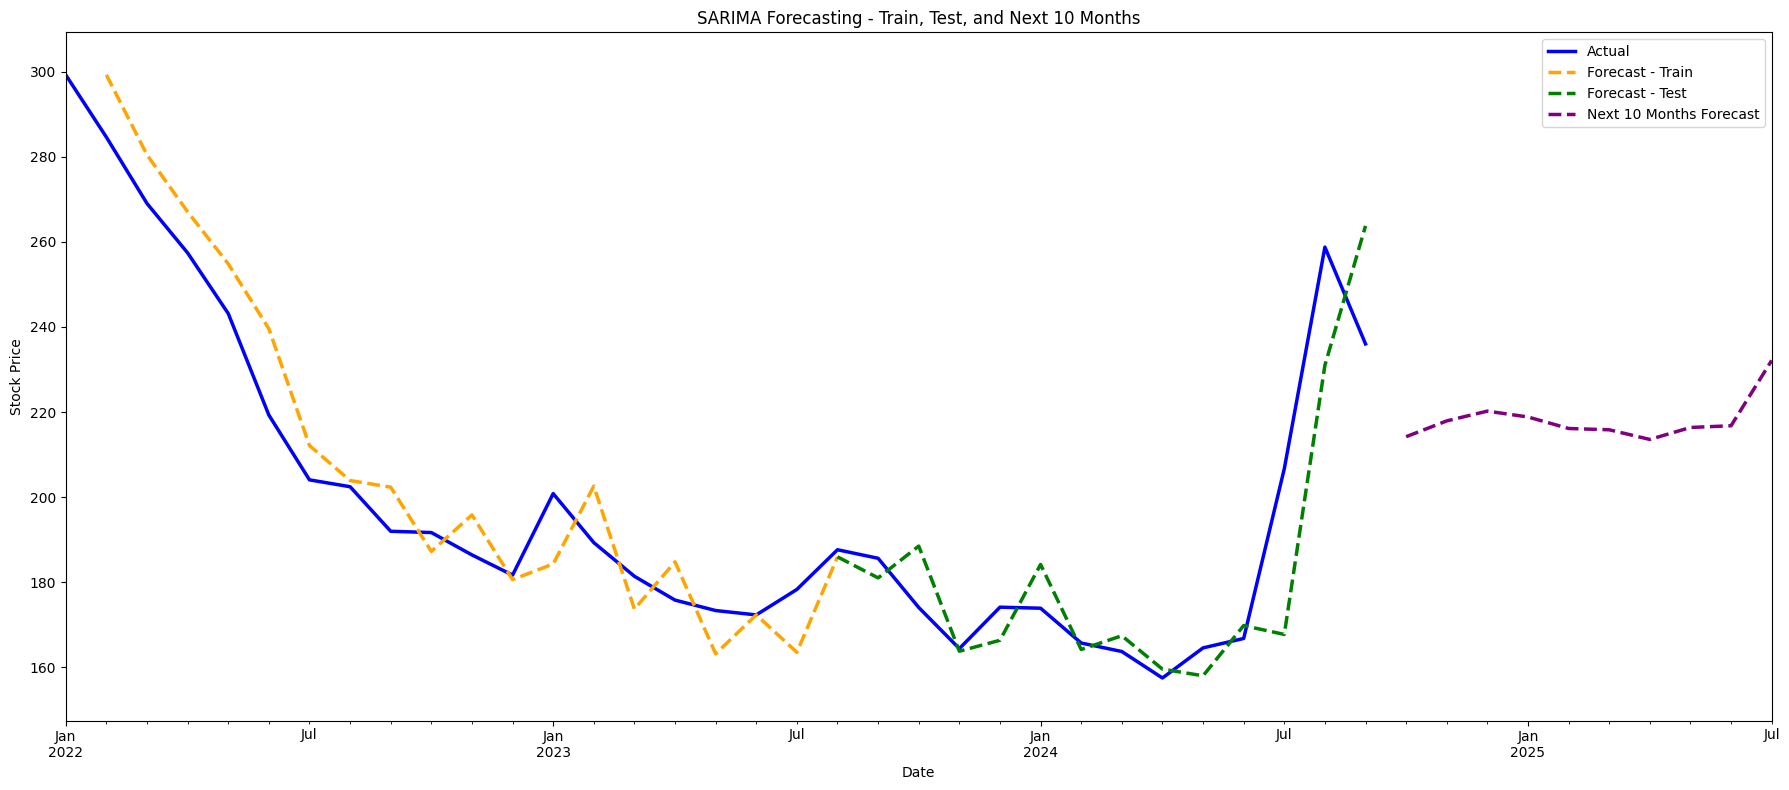

In [25]:
# Fit the model as before
model = sm.tsa.SARIMAX(modelling_series_czbil, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Train and Test Forecasts
forecasts_train = results.predict(start='2022-02-28', end='2023-08-31')
forecasts_test = results.predict(start='2023-08-31', end='2024-09-30')

# Forecast for the next 10 months after the test data
next_10_months_forecast = results.get_forecast(steps=10)
forecast_index = pd.date_range(start='2024-08-31', periods=10, freq='M')  # Correct frequency (monthly)

# Combine the forecasts for plotting
forecast_combined = pd.concat([
    forecasts_train,
    forecasts_test,
    pd.Series(next_10_months_forecast.predicted_mean, index=forecast_index)
])

# Start plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Plot Actual Data
modelling_series_czbil.plot(ax=ax, label='Actual', color='blue', linewidth=2.5)  # Bold actual data

# Plot Train Forecast Data
forecasts_train.plot(ax=ax, label='Forecast - Train', color='orange', linestyle='--', linewidth=2.5)  # Bolder forecast

# Plot Test Forecast Data
forecasts_test.plot(ax=ax, label='Forecast - Test', color='green', linestyle='--', linewidth=2.5)

# Plot Next 10 Months Forecast Data
next_10_months_forecast.predicted_mean.plot(ax=ax, label='Next 10 Months Forecast', color='purple', linestyle='--', linewidth=2.5)

# Set graph limits
y_min = min(modelling_series_czbil.min(), forecasts_train.min(), forecasts_test.min(), next_10_months_forecast.predicted_mean.min())
y_max = max(modelling_series_czbil.max(), forecasts_train.max(), forecasts_test.max(), next_10_months_forecast.predicted_mean.max())
ax.set_ylim(y_min - 10, y_max + 10)  # Setting limits for the y-axis

# Customize labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('SARIMA Forecasting - Train, Test, and Next 10 Months')

# Display the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Initialize lists to store metrics for each split
mae_list = []
mse_list = []
rmse_list = []
mape_list = []

## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series_czbil.values

# Assume time_series_splits and X are already defined, and you're using SARIMAX
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]

    # Fit the model on the training data
    model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(0, 1, 2, 12))
    results = model.fit()

    # Forecast on the test data
    forecasts = results.predict(start=len(train), end=len(train) + len(test) - 1)

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, forecasts)
    mse = mean_squared_error(test, forecasts)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - forecasts) / test)) * 100

    # Append metrics to their respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)

    # Print evaluation metrics for this split
    print(f'MAE for this split: {mae}')
    print(f'MSE for this split: {mse}')
    print(f'RMSE for this split: {rmse}')
    print(f'MAPE for this split: {mape:.2f}%')

# Calculate and print average values across all splits
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mape = np.mean(mape_list)

print(f'\nAverage MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAPE: {average_mape:.2f}%')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

MAE for this split: 70.7670999056997
MSE for this split: 9300.916343793908
RMSE for this split: 96.44125851415414
MAPE for this split: 37.22%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 45.33485311783414
MSE for this split: 3186.43200508356
RMSE for this split: 56.44848983882173
MAPE for this split: 24.87%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 34.82023512345402
MSE for this split: 1318.5284266747583
RMSE for this split: 36.311546740324324
MAPE for this split: 20.64%
MAE for this split: 12.71969066684691
MSE for this split: 325.29155511321227
RMSE for this split: 18.035840848521932
MAPE for this split: 5.82%

Average MAE: 40.91046970345869
Average MSE: 3532.7920826663594
Average RMSE: 51.80928398545553
Average MAPE: 22.14%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### **9.9 EBL Stock Forecasting and Evaluation Metrics**

In [27]:
modelling_series_ebl = monthly_mean_df['Close_EBL']
train,test = split(modelling_series_ebl,train_size=0.6,shuffle=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-28-3566d7be0d7a>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2024-10-31', periods=10, freq='M')  # Correct frequency (monthly)


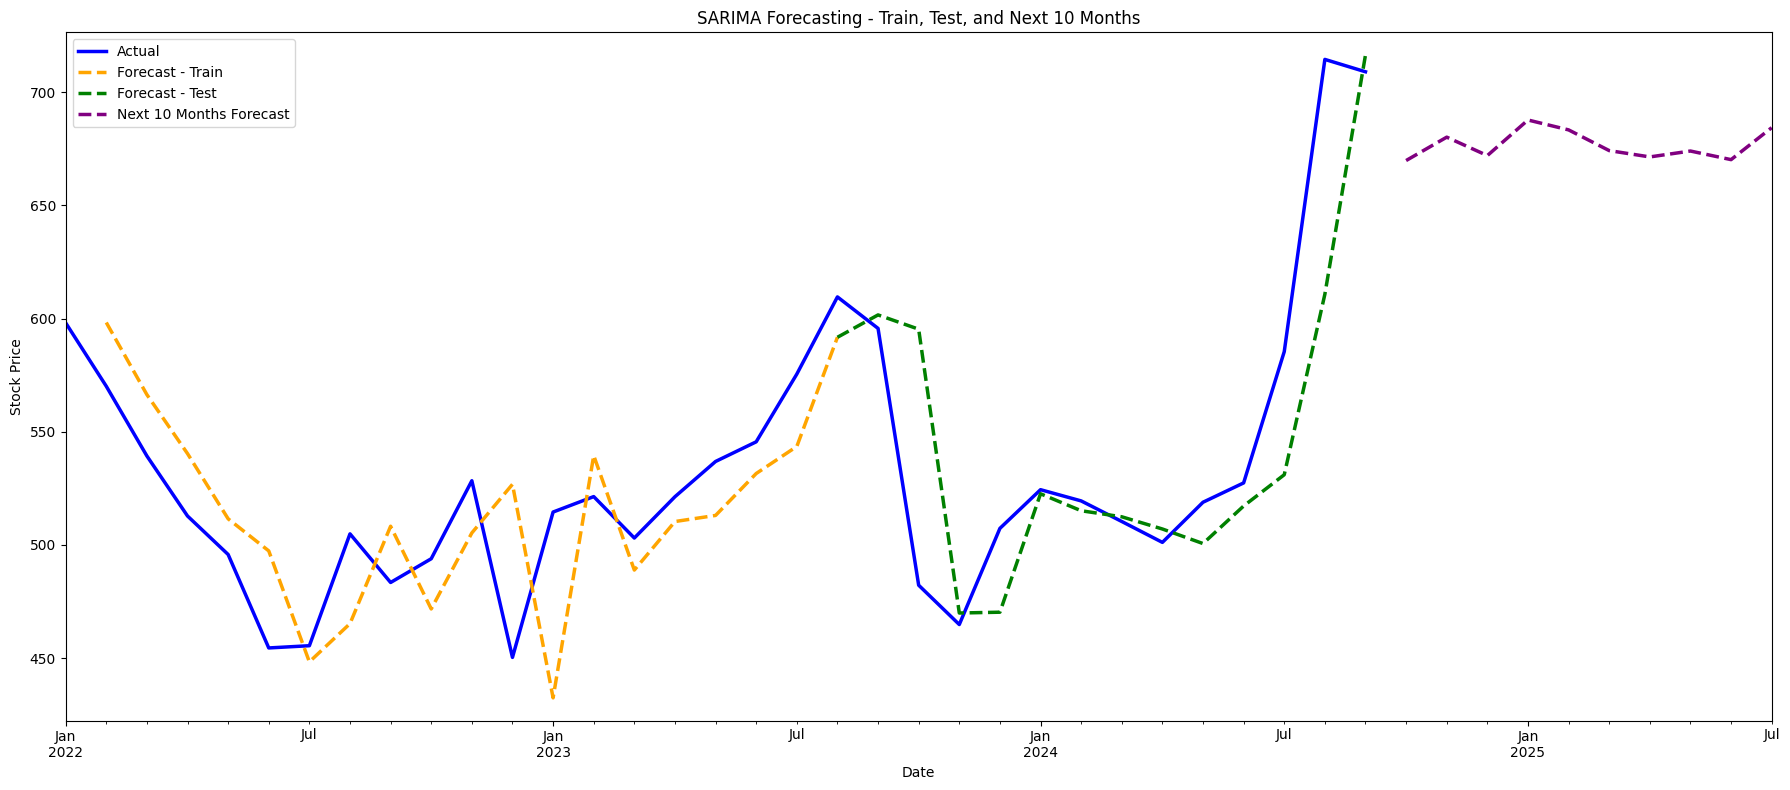

In [28]:
# Fit the model as before
model = sm.tsa.SARIMAX(modelling_series_ebl, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Train and Test Forecasts
forecasts_train = results.predict(start='2022-02-28', end='2023-08-31')
forecasts_test = results.predict(start='2023-08-31', end='2024-09-30')

# Forecast for the next 10 months after the test data
next_10_months_forecast = results.get_forecast(steps=10)
forecast_index = pd.date_range(start='2024-10-31', periods=10, freq='M')  # Correct frequency (monthly)

# Combine the forecasts for plotting
forecast_combined = pd.concat([
    forecasts_train,
    forecasts_test,
    pd.Series(next_10_months_forecast.predicted_mean, index=forecast_index)
])

# Start plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Plot Actual Data
modelling_series_ebl.plot(ax=ax, label='Actual', color='blue', linewidth=2.5)  # Bold actual data

# Plot Train Forecast Data
forecasts_train.plot(ax=ax, label='Forecast - Train', color='orange', linestyle='--', linewidth=2.5)  # Bolder forecast

# Plot Test Forecast Data
forecasts_test.plot(ax=ax, label='Forecast - Test', color='green', linestyle='--', linewidth=2.5)

# Plot Next 10 Months Forecast Data
next_10_months_forecast.predicted_mean.plot(ax=ax, label='Next 10 Months Forecast', color='purple', linestyle='--', linewidth=2.5)

# Set graph limits
y_min = min(modelling_series_ebl.min(), forecasts_train.min(), forecasts_test.min(), next_10_months_forecast.predicted_mean.min())
y_max = max(modelling_series_ebl.max(), forecasts_train.max(), forecasts_test.max(), next_10_months_forecast.predicted_mean.max())
ax.set_ylim(y_min - 10, y_max + 10)  # Setting limits for the y-axis

# Customize labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('SARIMA Forecasting - Train, Test, and Next 10 Months')

# Display the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Initialize lists to store metrics for each split
mae_list = []
mse_list = []
rmse_list = []
mape_list = []

## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series_ebl.values

# Assume time_series_splits and X are already defined, and you're using SARIMAX
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]

    # Fit the model on the training data
    model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(0, 1, 2, 12))
    results = model.fit()

    # Forecast on the test data
    forecasts = results.predict(start=len(train), end=len(train) + len(test) - 1)

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, forecasts)
    mse = mean_squared_error(test, forecasts)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test - forecasts) / test)) * 100

    # Append metrics to their respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)

    # Print evaluation metrics for this split
    print(f'MAE for this split: {mae}')
    print(f'MSE for this split: {mse}')
    print(f'RMSE for this split: {rmse}')
    print(f'MAPE for this split: {mape:.2f}%')

# Calculate and print average values across all splits
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_mape = np.mean(mape_list)

print(f'\nAverage MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAPE: {average_mape:.2f}%')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

MAE for this split: 135.02945207372161
MSE for this split: 29672.121733195454
RMSE for this split: 172.2559773511371
MAPE for this split: 26.44%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 60.84385248242841
MSE for this split: 4149.09686126712
RMSE for this split: 64.41348353619078
MAPE for this split: 10.72%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE for this split: 69.83089172006636
MSE for this split: 7156.518329754978
RMSE for this split: 84.5962075376608
MAPE for this split: 14.31%
MAE for this split: 110.6676505612091
MSE for this split: 18118.509800186413
RMSE for this split: 134.60501402320202
MAPE for this split: 17.24%

Average MAE: 94.09296170935637
Average MSE: 14774.061681100993
Average RMSE: 113.96767061204767
Average MAPE: 17.18%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### **10. Long Short Term Memory (LSTM)**

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [31]:
stock_data = pd.read_csv('/content/drive/MyDrive/stock_data_top50.csv')

In [32]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

In [33]:
stock = stock_data[['Date', 'Close_ADBL', 'High_ADBL', 'Low_ADBL', 'Open_ADBL', 'Vol_ADBL']]

In [34]:
scaler = MinMaxScaler()
normalized_data = stock[['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL']].copy()
normalized_data = scaler.fit_transform(normalized_data)

In [35]:
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

In [36]:
train_df = pd.DataFrame(train_data, columns=['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL'])
test_df = pd.DataFrame(test_data, columns=['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL'])

In [37]:
def generate_sequences(df, seq_length=50):
    X = df[['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL']].reset_index(drop=True)
    y = df[['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL']].reset_index(drop=True)

    sequences = []
    labels = []

    for index in range(len(X) - seq_length + 1):
        sequences.append(X.iloc[index : index + seq_length].values)
        labels.append(y.iloc[index + seq_length - 1].values)

    sequences = np.array(sequences)
    labels = np.array(labels)

    return sequences, labels

In [38]:
train_sequences, train_labels = generate_sequences(train_df)
test_sequences, test_labels = generate_sequences(test_df)

In [39]:
# Prepare data for plotting
train_close_actual = scaler.inverse_transform(train_labels)[:, 0]  # Actual values for training
test_close_actual = scaler.inverse_transform(test_labels)[:, 0]  # Actual values for testing

# Create a figure
fig = go.Figure()

# Add traces for training data
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual,
                         mode='lines', name='Train', opacity=0.7,
                         line=dict(color='cornflowerblue')))  # Darker blue for actual

# Add traces for test data
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual), len(train_close_actual) + len(test_close_actual)),
                         y=test_close_actual, mode='lines', name='Test', opacity=0.7,
                         line=dict(color='green')))  # Dark green for actual

# Update layout
fig.update_layout(title='Train Test Split for ADBL Stock Close Price',
                  xaxis_title='Time Steps',
                  yaxis_title='Close Price',
                  template='plotly_white')

# Show the figure
fig.show()

In [40]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(50, 5)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=5)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [41]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,855 (202.56 KB)

 Trainable params: 51,855 (202.56 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
epochs = 200
batch_size = 32

history = model.fit(
    train_sequences,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_sequences, test_labels),
    verbose=1
)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0236 - mean_absolute_error: 0.1061 - val_loss: 0.0203 - val_mean_absolute_error: 0.0869
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0044 - mean_absolute_error: 0.0476 - val_loss: 0.0222 - val_mean_absolute_error: 0.0949
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0445 - val_loss: 0.0215 - val_mean_absolute_error: 0.0911
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - mean_absolute_error: 0.0396 - val_loss: 0.0232 - val_mean_absolute_error: 0.0980
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - mean_absolute_error: 0.0382 - val_loss: 0.0218 - val_mean_absolute_error: 0.0915
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - mean_absolute_error: 0.0347 - val_loss: 0.0203 - val_mean_absolute_error: 0.0867
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0369 - v

In [43]:
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [44]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Close Predictions'))

train_close_pred = train_predictions[:, 0]
train_close_actual = train_labels[:, 0]

fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual, mode='lines', name='Actual', opacity=0.9))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_pred)), y=train_close_pred, mode='lines', name='Predicted', opacity=0.6))

fig.update_layout(title='Close Predictions on Train Data', template='plotly_dark')
fig.show()

In [45]:
latest_prediction = []
last_seq = test_sequences[:-1]

for _ in range(90):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━

In [46]:
pi.templates.default = "plotly_dark"

predicted_data_next = scaler.inverse_transform(np.array(latest_prediction).reshape(-1, 5))
last_date = stock['Date'].max()
next_90_days = [last_date + timedelta(days=i) for i in range(1, 91)]

for i, feature_name in enumerate(['Open_ADBL', 'High_ADBL', 'Low_ADBL', 'Vol_ADBL', 'Close_ADBL']):
    if feature_name in ['Vol_ADBL', 'Close_ADBL']:
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=next_90_days, y=predicted_data_next[:, i],
                                 mode='lines+markers', name=f'Predicted {feature_name.capitalize()}'))

        fig.update_layout(title=f'Predicted {feature_name.capitalize()} for the Next 90 Days',
                          xaxis_title='Date', yaxis_title=f'{feature_name.capitalize()}')

        fig.show()

In [47]:
# Flatten the predictions and actual values for evaluation
train_close_actual_flat = scaler.inverse_transform(train_labels)[:, 0]  # Actual values
train_close_pred_flat = scaler.inverse_transform(train_predictions)[:, 0]  # Predicted values

# Calculate MAE and MSE
mae = mean_absolute_error(train_close_actual_flat, train_close_pred_flat)
mse = mean_squared_error(train_close_actual_flat, train_close_pred_flat)
rmse = np.sqrt(mean_squared_error(train_close_actual_flat, train_close_pred_flat))
mape = np.mean(np.abs((train_close_actual_flat - train_close_pred_flat) / train_close_actual_flat)) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error: 2.4315953662514014
Mean Squared Error: 8.994329997591015
Root Mean Squared Error (RMSE): 2.9990548507139736
Mean Absolute Percentage Error (MAPE): 0.849836115324323%


In [48]:
# Prepare data for plotting
train_close_actual = scaler.inverse_transform(train_labels)[:, 0]  # Actual values for training
train_close_pred = scaler.inverse_transform(train_predictions)[:, 0]  # Predicted values for training
test_close_actual = scaler.inverse_transform(test_labels)[:, 0]  # Actual values for testing
test_close_pred = scaler.inverse_transform(test_predictions)[:, 0]  # Predicted values for testing

# Create a figure
fig = go.Figure()

# Add traces for training data
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual,
                         mode='lines', name='Train Actual', opacity=0.7))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_pred)), y=train_close_pred,
                         mode='lines', name='Train Predicted', opacity=0.7))

# Add traces for test data
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual), len(train_close_actual) + len(test_close_actual)),
                         y=test_close_actual, mode='lines', name='Test Actual', opacity=0.7))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual), len(train_close_actual) + len(test_close_pred)),
                         y=test_close_pred, mode='lines', name='Test Predicted', opacity=0.7))

# Update layout
fig.update_layout(title='Train and Test Data with Predictions',
                  xaxis_title='Time Steps',
                  yaxis_title='Close Price',
                  template='plotly_dark')

# Show the figure
fig.show()

In [49]:
# Get the last 50 days of actual and predicted values from the test set
last_50_days_actual = test_close_actual[-50:]  # Actual values for the last 50 days
last_50_days_pred = test_close_pred[-50:]      # Predicted values for the last 50 days

# Create a figure
fig = go.Figure()

# Add trace for actual values
fig.add_trace(go.Scatter(x=np.arange(len(last_50_days_actual)), y=last_50_days_actual,
                         mode='lines', name='Actual Close Price', opacity=0.7))

# Add trace for predicted values
fig.add_trace(go.Scatter(x=np.arange(len(last_50_days_pred)), y=last_50_days_pred,
                         mode='lines', name='Predicted Close Price', opacity=0.7))

# Update layout
fig.update_layout(title='Actual vs Predicted Close Price for the Last 50 Days',
                  xaxis_title='Days',
                  yaxis_title='Close Price',
                  template='plotly_dark')

# Show the figure
fig.show()

#### **11. Evaluation Metrics**

Evaluation metrics are crucial for assessing the performance of time series models.

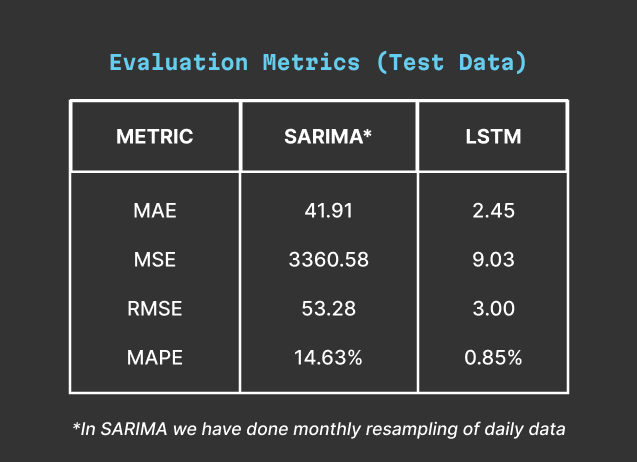


#### **12. Conclusion**

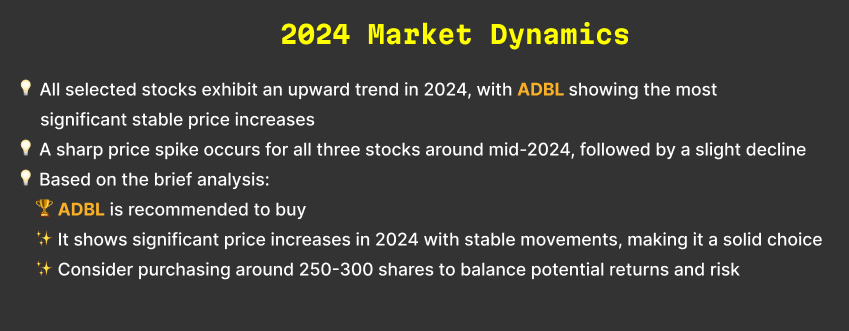